# Lesson 10 Classification

**Agenda**

- Using logistic regression
- What is the usage of **classification accuracy**, and what are its limitations?
- How does a **confusion matrix** describe the performance of a classifier?
- What **metrics** can be computed from a confusion matrix?
- How can you adjust classifier performance by **changing the classification threshold**?
- What is the purpose of an **ROC curve**?
- How does **Area Under the Curve (AUC)** differ from classification accuracy?
- Using knn 
- How can cross-validation be used for selecting **tuning parameters**, choosing between **models**, and selecting **features**?
- What are some possible **improvements** to cross-validation?
---

- Diabetes dataset

In [11]:
#!/usr/bin/env python3
""" Lesson 10 Classification """

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import metrics

import pandas as pd
# read the data into a Pandas DataFrame
url = 'diabetes.csv'
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv(url, header=None, names=col_names, skiprows = 1)
# print the first 5 rows of data
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
# Explore the dataset
pima.describe()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Goal:** Can we predict the diabetes status (label) of a patient given their health measurements?


In [13]:
# define X and y
feature_cols = ['pregnant', 'insulin', 'bmi', 'age']
X = pima[feature_cols]
y = pima.label

In [14]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

## Using Logistic regression

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
logreg = LogisticRegression(max_iter=1000, multi_class='auto', solver='lbfgs')

In [17]:
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [18]:
y_predlog = logreg.predict(X_test)
print(metrics.accuracy_score(y_test, y_predlog))

0.6770833333333334


In [19]:
# examine the class distribution of the testing set (using a Pandas Series method)
y_test.value_counts()

0    130
1     62
Name: label, dtype: int64

In [20]:
# calculate the percentage of ones
y_test.mean()

0.3229166666666667

In [21]:
# calculate the percentage of zeros
1 - y_test.mean()

0.6770833333333333

In [22]:
# calculate null accuracy (for binary classification problems coded as 0/1)
max(y_test.mean(), 1 - y_test.mean())

0.6770833333333333

In [24]:
# print the first 25 true and predicted responses
from __future__ import print_function
print('True:', y_test.values[0:25])
print('Pred:', y_predlog[0:25])

True: [1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0]
Pred: [0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


## Confusion matrix

Table that describes the performance of a classification model

In [25]:
# IMPORTANT: first argument is true values, second argument is predicted values
print(metrics.confusion_matrix(y_test, y_predlog))

[[114  16]
 [ 46  16]]


[Text(0.5, 0, 'Predicted'), Text(0, 0.5, 'True')]

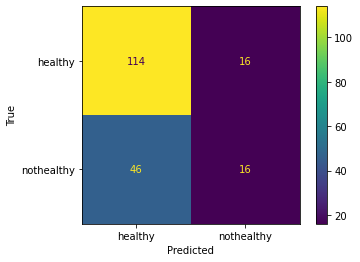

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = metrics.confusion_matrix(y_test, y_predlog)
cmd = ConfusionMatrixDisplay(cm, display_labels=['healthy','nothealthy'])
cmd.plot()
cmd.ax_.set(xlabel='Predicted', ylabel='True')

**Basic terminology**

- **True Positives (TP):** we *correctly* predicted that they *do* have diabetes
- **True Negatives (TN):** we *correctly* predicted that they *don't* have diabetes
- **False Positives (FP):** we *incorrectly* predicted that they *do* have diabetes (a "Type I error")
- **False Negatives (FN):** we *incorrectly* predicted that they *don't* have diabetes (a "Type II error")

In [30]:
# save confusion matrix and slice into four pieces
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

## Metrics computed from a confusion matrix

**Classification Accuracy:** Overall, how often is the classifier correct?

In [31]:
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_predlog))

0.6770833333333334
0.6770833333333334


**Classification Error:** Overall, how often is the classifier incorrect?

- Also known as "Misclassification Rate"

In [33]:
print((FP + FN) / float(TP + TN + FP + FN))
print(1 - metrics.accuracy_score(y_test, y_predlog))

0.3229166666666667
0.32291666666666663


**Sensitivity:** When the actual value is positive, how often is the prediction correct?

- How "sensitive" is the classifier to detecting positive instances?
- Also known as "True Positive Rate" or "Recall"

In [34]:
print(TP / float(TP + FN))
print(metrics.recall_score(y_test, y_predlog))

0.25806451612903225
0.25806451612903225


**Specificity:** When the actual value is negative, how often is the prediction correct?

- How "specific" (or "selective") is the classifier in predicting positive instances?

In [36]:
print(TN / float(TN + FP))
print(metrics.recall_score(y_test, y_predlog,pos_label=0))

0.8769230769230769
0.8769230769230769


**False Positive Rate:** When the actual value is negative, how often is the prediction incorrect?
- It's the probability that a false alarm will be raised: that a positive result will be given when the true value is negative.

In [37]:
print(FP / float(TN + FP))

0.12307692307692308


**Precision:** When a positive value is predicted, how often is the prediction correct?

- How "precise" is the classifier when predicting positive instances?

In [39]:
print(TP / float(TP + FP))
print(metrics.precision_score(y_test, y_predlog))

0.5
0.5


Many other metrics can be computed: F1 score, Matthews correlation coefficient, etc.

**Discussion:**

- Confusion matrix gives you a **more complete picture** of how your classifier is performing
- Also allows you to compute various **classification metrics**, and these metrics can guide your model selection

**Which metrics should you focus on?**

- Choice of metric depends on your **business objective**
- **Spam filter** (positive class is "spam"): Optimize for **precision or specificity** because false negatives (spam goes to the inbox) are more acceptable than false positives (non-spam is caught by the spam filter)
- **Fraudulent transaction detector** (positive class is "fraud"): Optimize for **sensitivity** because false positives (normal transactions that are flagged as possible fraud) are more acceptable than false negatives (fraudulent transactions that are not detected)

## Adjusting the classification threshold

In [54]:
# print the first 10 predicted responses
logreg.predict(X_test)[0:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1], dtype=int64)

In [55]:
# print the first 10 predicted probabilities of class membership
logreg.predict_proba(X_test)[0:10, :]

array([[0.61405867, 0.38594133],
       [0.7505398 , 0.2494602 ],
       [0.74167648, 0.25832352],
       [0.60291327, 0.39708673],
       [0.88426611, 0.11573389],
       [0.87695895, 0.12304105],
       [0.50819992, 0.49180008],
       [0.44582289, 0.55417711],
       [0.77950769, 0.22049231],
       [0.25853303, 0.74146697]])

In [56]:
# print the first 10 predicted probabilities for class 1
logreg.predict_proba(X_test)[0:10, 1]

array([0.38594133, 0.2494602 , 0.25832352, 0.39708673, 0.11573389,
       0.12304105, 0.49180008, 0.55417711, 0.22049231, 0.74146697])

In [57]:
# store the predicted probabilities for class 1
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

In [58]:
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14

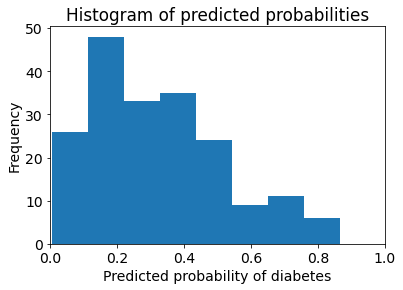

In [59]:
# histogram of predicted probabilities
plt.hist(y_pred_prob, bins=8)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of diabetes')
plt.ylabel('Frequency')
plt.show()

**Decrease the threshold** for predicting diabetes in order to **increase the sensitivity** of the classifier

In [60]:
# predict diabetes if the predicted probability is greater than 0.3
from sklearn.preprocessing import binarize
y_pred_class = binarize([y_pred_prob], 0.3)[0]

C:\Users\dzr5484\Anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass threshold=0.3 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [61]:
# print the first 10 predicted probabilities
y_pred_prob[0:10]

array([0.38594133, 0.2494602 , 0.25832352, 0.39708673, 0.11573389,
       0.12304105, 0.49180008, 0.55417711, 0.22049231, 0.74146697])

In [62]:
# print the first 10 predicted classes with the lower threshold
y_pred_class[0:10]

array([1., 0., 0., 1., 0., 0., 1., 1., 0., 1.])

In [63]:
# previous confusion matrix (default threshold of 0.5)
print(cm)

[[114  16]
 [ 46  16]]


In [64]:
# new confusion matrix (threshold of 0.3)
print(metrics.confusion_matrix(y_test, y_pred_class))

[[82 48]
 [17 45]]


In [65]:
# sensitivity has increased (used to be 0.258)
print(metrics.recall_score(y_test, y_pred_class))

0.7419354838709677


In [66]:
# specificity has decreased (used to be 0.876)
print(metrics.recall_score(y_test, y_pred_class,pos_label=0))

0.6307692307692307


**Discussion:**

- **Threshold of 0.5** is used by default (for binary problems) to convert predicted probabilities into class predictions
- Threshold can be **adjusted** to increase sensitivity or specificity
- Sensitivity and specificity have an **inverse relationship**

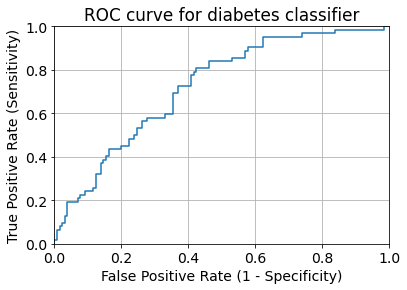

In [67]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()

- ROC curve can help you to **choose a threshold** that balances sensitivity and specificity in a way that makes sense for your particular context
- You can't actually **see the thresholds** used to generate the curve on the ROC curve itself

In [68]:
def evaluate_threshold(threshold):
    """ Define a function that accepts a threshold and prints sensitivity and specificity """
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

In [69]:
evaluate_threshold(0.5)

Sensitivity: 0.25806451612903225
Specificity: 0.8769230769230769


In [70]:
evaluate_threshold(0.3)

Sensitivity: 0.7258064516129032
Specificity: 0.6307692307692307


AUC is the **percentage** of the ROC plot that is **underneath the curve**:

In [71]:
# IMPORTANT: first argument is true values, second argument is predicted probabilities
print(metrics.roc_auc_score(y_test, y_pred_prob))

0.7227047146401985


- AUC is useful as a **single number summary** of classifier performance.
- If you randomly chose one positive and one negative observation, AUC represents the likelihood that your classifier will assign a **higher predicted probability** to the positive observation.
- AUC is useful even when there is **high class imbalance** (unlike classification accuracy).

**Confusion matrix advantages:**

- Allows you to calculate a **variety of metrics**
- Useful for **multi-class problems** (more than two response classes)

**ROC/AUC advantages:**

- Does not require you to **set a classification threshold**
- Still useful when there is **high class imbalance**

## K-nearest neighbors (KNN) classification

1. Pick a value for K.
2. Search for the K observations in the training data that are "nearest" to the measurements of the unknown iris.
3. Use the most popular response value from the K nearest neighbors as the predicted response value for the unknown iris.

In [73]:
from sklearn.neighbors import KNeighborsClassifier

In [74]:
knn = KNeighborsClassifier(n_neighbors=1)

In [75]:
print(knn)

KNeighborsClassifier(n_neighbors=1)


In [76]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [77]:
y_predknn1 = knn.predict(X_test)

In [78]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_predknn1))

0.6458333333333334


## Using a different value for K

In [79]:
# instantiate the model (using the value K=5)
knn = KNeighborsClassifier(n_neighbors=5)

# fit the model with data
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [80]:
# predict the response for new observations
y_predknn5 = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_predknn5))

0.7291666666666666


### Cross-validation: parameter tuning

In [84]:
from sklearn.model_selection import cross_val_score
# 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
print(scores)

[0.63793103 0.72413793 0.67241379 0.70689655 0.67241379 0.65517241
 0.75438596 0.61403509 0.64912281 0.70175439]


In [85]:
# use average accuracy as an estimate of out-of-sample accuracy
print(scores.mean())

0.6788263762855413


In [86]:
# search for an optimal value of K for KNN
k_range = list(range(1, 31))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.6441318814277073, 0.6596491228070176, 0.6509981851179674, 0.6788263762855413, 0.6788263762855413, 0.6702964307320023, 0.6651542649727767, 0.6825166364186328, 0.6788868723532971, 0.6737144585601935, 0.6839685420447671, 0.6875075620084694, 0.6909255898366605, 0.6806412583182093, 0.6753781004234725, 0.6910768300060496, 0.6910768300060497, 0.6858439201451905, 0.6840592861464005, 0.6771929824561403, 0.6720205686630368, 0.6650937689050211, 0.6823653962492437, 0.6824258923169993, 0.6824258923169995, 0.684119782214156, 0.6858136721113126, 0.6841197822141561, 0.6926799758015729, 0.692649727767695]


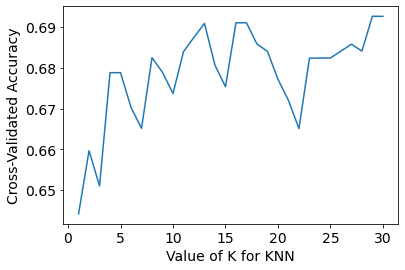

[0.6858439201451905, 0.6840592861464005, 0.6771929824561403]


In [90]:
# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()


- Remember **Training accuracy** rises as model complexity increases
- Note **Testing accuracy** penalizes models that are too complex or not complex enough
- For KNN models, complexity is determined by the **value of K** (lower value = more complex)
- Therefore, the "best" model in the Figure is for K=30 - it is less complex and provides the best accuracy

### Cross-validation: model selection
**Goal:** Compare the best KNN model with logistic regression on the diabetes dataset

In [91]:
# 10-fold cross-validation with the best KNN model
knn = KNeighborsClassifier(n_neighbors=30)
print(cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy').mean())

0.692649727767695


In [93]:
# 10-fold cross-validation with logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000, multi_class='auto', solver='lbfgs')
print(cross_val_score(logreg, X_train, y_train, cv=10, scoring='accuracy').mean())

0.6822746521476104


### Cross-validation example: Generalization
**Goal:** Provide the estimate of the accuracy on the unseen data on the Diabetes dataset

In [95]:
# 10-fold cross-validation with the best model
knn = KNeighborsClassifier(n_neighbors=30)
print(cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean())

0.6900546821599453


## Improvements to cross-validation

**Repeated cross-validation**

- Repeat cross-validation multiple times (with **different random splits** of the data) and average the results
- More reliable estimate of out-of-sample performance by **reducing the variance** associated with a single trial of cross-validation

**Creating a hold-out set**

- "Hold out" a portion of the data **before** beginning the model building process
- Locate the best model using cross-validation on the remaining data, and test it **using the hold-out set**
- More reliable estimate of out-of-sample performance since hold-out set is **truly out-of-sample**

**Feature engineering and selection within cross-validation iterations**

- Normally, feature engineering and selection occurs **before** cross-validation
- Instead, perform all feature engineering and selection **within each cross-validation iteration**
- More reliable estimate of out-of-sample performance since it **better mimics** the application of the model to out-of-sample data